ベイズ最適化入門  
https://github.com/Ma-sa-ue/practice/blob/master/machine%20learning(python)/bayeisan_optimization.ipynb  
The original code is based on python2. A few modifications to fit it to python3 are needed.

In [1]:
%matplotlib inline
%run ../common/homemade_GPR.py
import sys
import matplotlib.pyplot as plt
np.random.seed(seed=123)

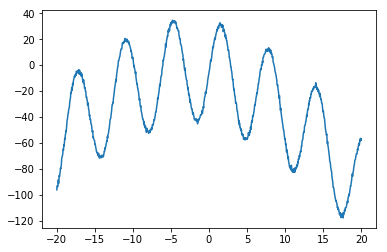

In [2]:
#Define data, supervised data
def x2y(x):
    f = 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
    return f
#
xmin = -20
xmax = 20
Nx = 1000
x = np.linspace(xmin, xmax, Nx)
y = list(map(x2y,x)) #for python3
y = np.array(y)
plt.plot(x, y) #### plot true data
plt.show()

1.0 0.010000000000000002 0.0 0.1 0.0


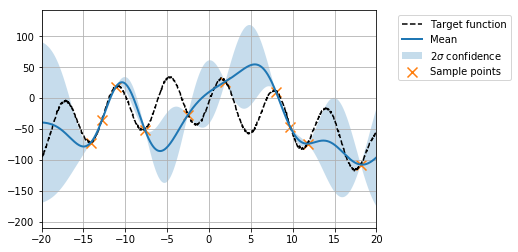

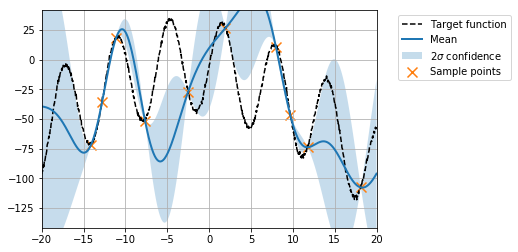

In [3]:
#Define GPR and Bayesian opt.
GPR = Gaussian_Process_Regression(alpha = 1.0e-13)
#GPR.a1_RBF = 0.0
typical_scale=0.1
GPR.a1_RBF = 1.0
GPR.a2_RBF = typical_scale**2
GPR.a1_exp = 0.0
GPR.a2_exp = typical_scale
GPR.a1_const = 0.0
print(GPR.a1_RBF, GPR.a2_RBF, GPR.a1_exp, GPR.a2_exp, GPR.a1_const)
#print('# The choice of the kernel: ', GPR.kernel_name1)
#
#Definition of array
Nsample = 10
x_sample = np.array([])
y_sample = np.array([])
x_point = np.random.uniform(xmin, xmax, Nsample) #Initial point is randomely chosen
#
x_sample = np.append(x_sample,x_point)                          #Add x_point to x_sample
y_point = x2y(x_point)                              #Get y_point value from x_sample
y_sample = np.append(y_sample,y_point)                          #Add y_point to x_ample
#
mean, std = GPR.xsample2meanstd(x_sample, y_sample, x, normalization = True) #Get mean/std

plt.figure()
plt.xlim(xmin,xmax)
plt.ylim(1.2*min(np.amin(y),np.amin(mean - std)),1.2*max(np.amax(y),np.amax(mean + std)))
plt.plot(x,y,'k--',label='Target function')
plt.plot(x,np.array(mean), label='Mean',lw=2.0)
high_bound = mean+ 1.0*std
lower_bound = mean- 1.0*std
plt.fill_between(x,high_bound,lower_bound, alpha=0.25, label='$2\sigma$ confidence')
plt.scatter(x_sample,y_sample,marker='x',s=100,label='Sample points')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
#
plt.figure()
plt.xlim(xmin,xmax)
plt.ylim(1.2*np.amin(y),1.2*np.amax(y))
plt.plot(x,y,'k--',label='Target function')
plt.plot(x,np.array(mean), label='Mean',lw=2.0)
high_bound = mean+ 1.0*std
lower_bound = mean- 1.0*std
plt.fill_between(x,high_bound,lower_bound, alpha=0.25, label='$2\sigma$ confidence')
plt.scatter(x_sample,y_sample,marker='x',s=100,label='Sample points')
plt.grid()
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()